In [52]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.10.0
19.24.4


In [53]:
my_image_path = 'images/me.png' # 본인 이미지가 있는 경로를 가지고 온다.

img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [54]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print(dlib_rects)   

rectangles[[(349, 231) (617, 498)]]


In [55]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

In [56]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [57]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(list_points)
print(len(list_landmarks))
print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

[(344, 275), (347, 314), (351, 353), (354, 391), (364, 428), (384, 459), (410, 486), (443, 504), (481, 509), (519, 504), (553, 486), (581, 460), (602, 428), (612, 392), (617, 353), (621, 313), (622, 272), (368, 270), (384, 254), (408, 250), (433, 254), (456, 264), (500, 262), (522, 249), (548, 245), (572, 248), (591, 263), (478, 296), (477, 325), (477, 354), (476, 384), (448, 393), (462, 398), (478, 403), (495, 398), (511, 392), (397, 300), (411, 298), (427, 297), (442, 303), (426, 307), (410, 307), (518, 301), (532, 295), (547, 294), (563, 295), (549, 303), (533, 304), (435, 438), (450, 428), (466, 422), (480, 427), (494, 422), (510, 428), (529, 437), (511, 447), (494, 452), (479, 454), (465, 452), (449, 448), (443, 437), (465, 436), (480, 438), (494, 436), (521, 437), (494, 435), (480, 437), (465, 435)]
1
68


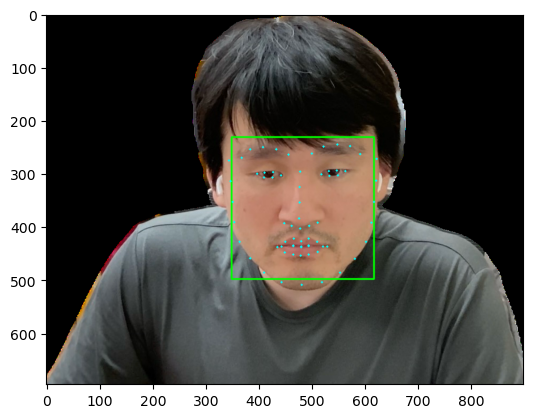

In [58]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

    # RGB 이미지로 전환
plt.imshow(img_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [59]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 33 입니다
    x = landmark[33][0] 
    y = landmark[33][1] 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(478, 403)
(x,y) : (478,403)
(w,h) : (269,269)


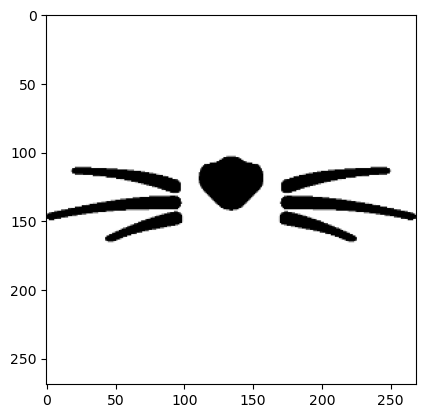

In [60]:
sticker_path = 'images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행
# img_sticker = 255 - img_sticker
plt.imshow(img_sticker)
plt.show()

In [61]:
# redefined_x, redefine_y 는 스티커의 (0, 0)이 있어야 하는 좌표
# 얼굴의 33 지점에 고양이 수염의 코가 오길 바라기 때문에 
# redefined_x은 landmark[33][0] - 130
# redefined_y는 landmark[33][1] - 130
refined_x = x - 130
refined_y = y - 130
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (348,273)


In [62]:
sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


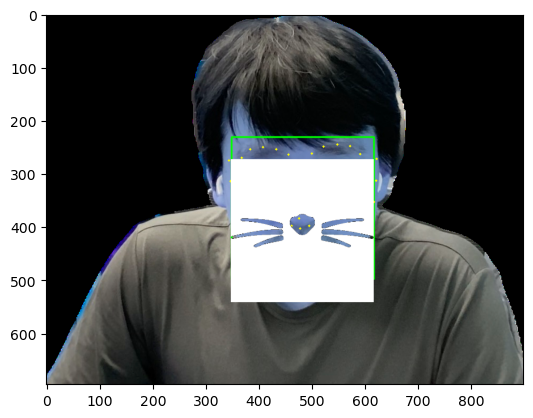

In [63]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()

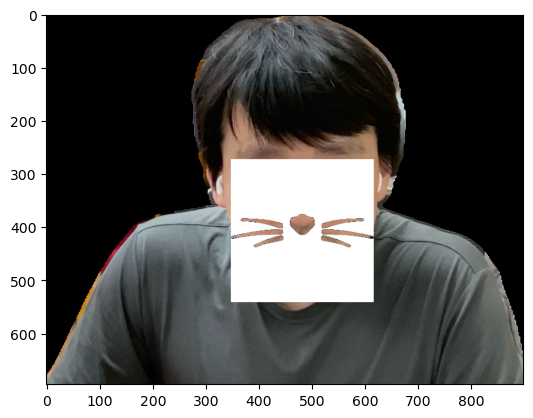

In [64]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## 회고
- 이미지를 이용하여 얼굴을 식별하고 식별된 정보를 바탕으로 다른 이미지를 합성하여 보았다.
- 얼굴의 정면에서는 dlib의 face detector가 face landmark를 잘 식별하는 것 같다.
- 그러나 정면이 아닌 90도 정도의 사진에서는 landmark를 생성하지 못하였고, 도중에 에러가 발생하였다.
---
- 스티커 사진이 제대로 적용되기 위해서는 얼굴의 각도에 따라서 스티커의 각도도 조정될 필요가 있다.
- 멀거나 측면 사진은 68개의 face landmark를 식별할 수 없어서 동작하지 않는 것 같다.
- 실행 속도가 그렇게 중요한 것은 아니지만, 사람이 인내할 수 없을 정도로 느려서는 안되겠다.
- 수염이 이마에 붙으면 안될까? 그 나름의 재미도 있을 것이라 생각한다. 정확도는 생각보다 중요하지 않다고 생각한다. 